# 策略怎么样，米筐来分析

## 收益概览

展示策略的风险调整收益（Sharpe, InformationRatio等）、回测收益图、每日盈亏图以及成交记录图。您自己通过plot画图结果也会在该页面展示，具体展示的页面如下：

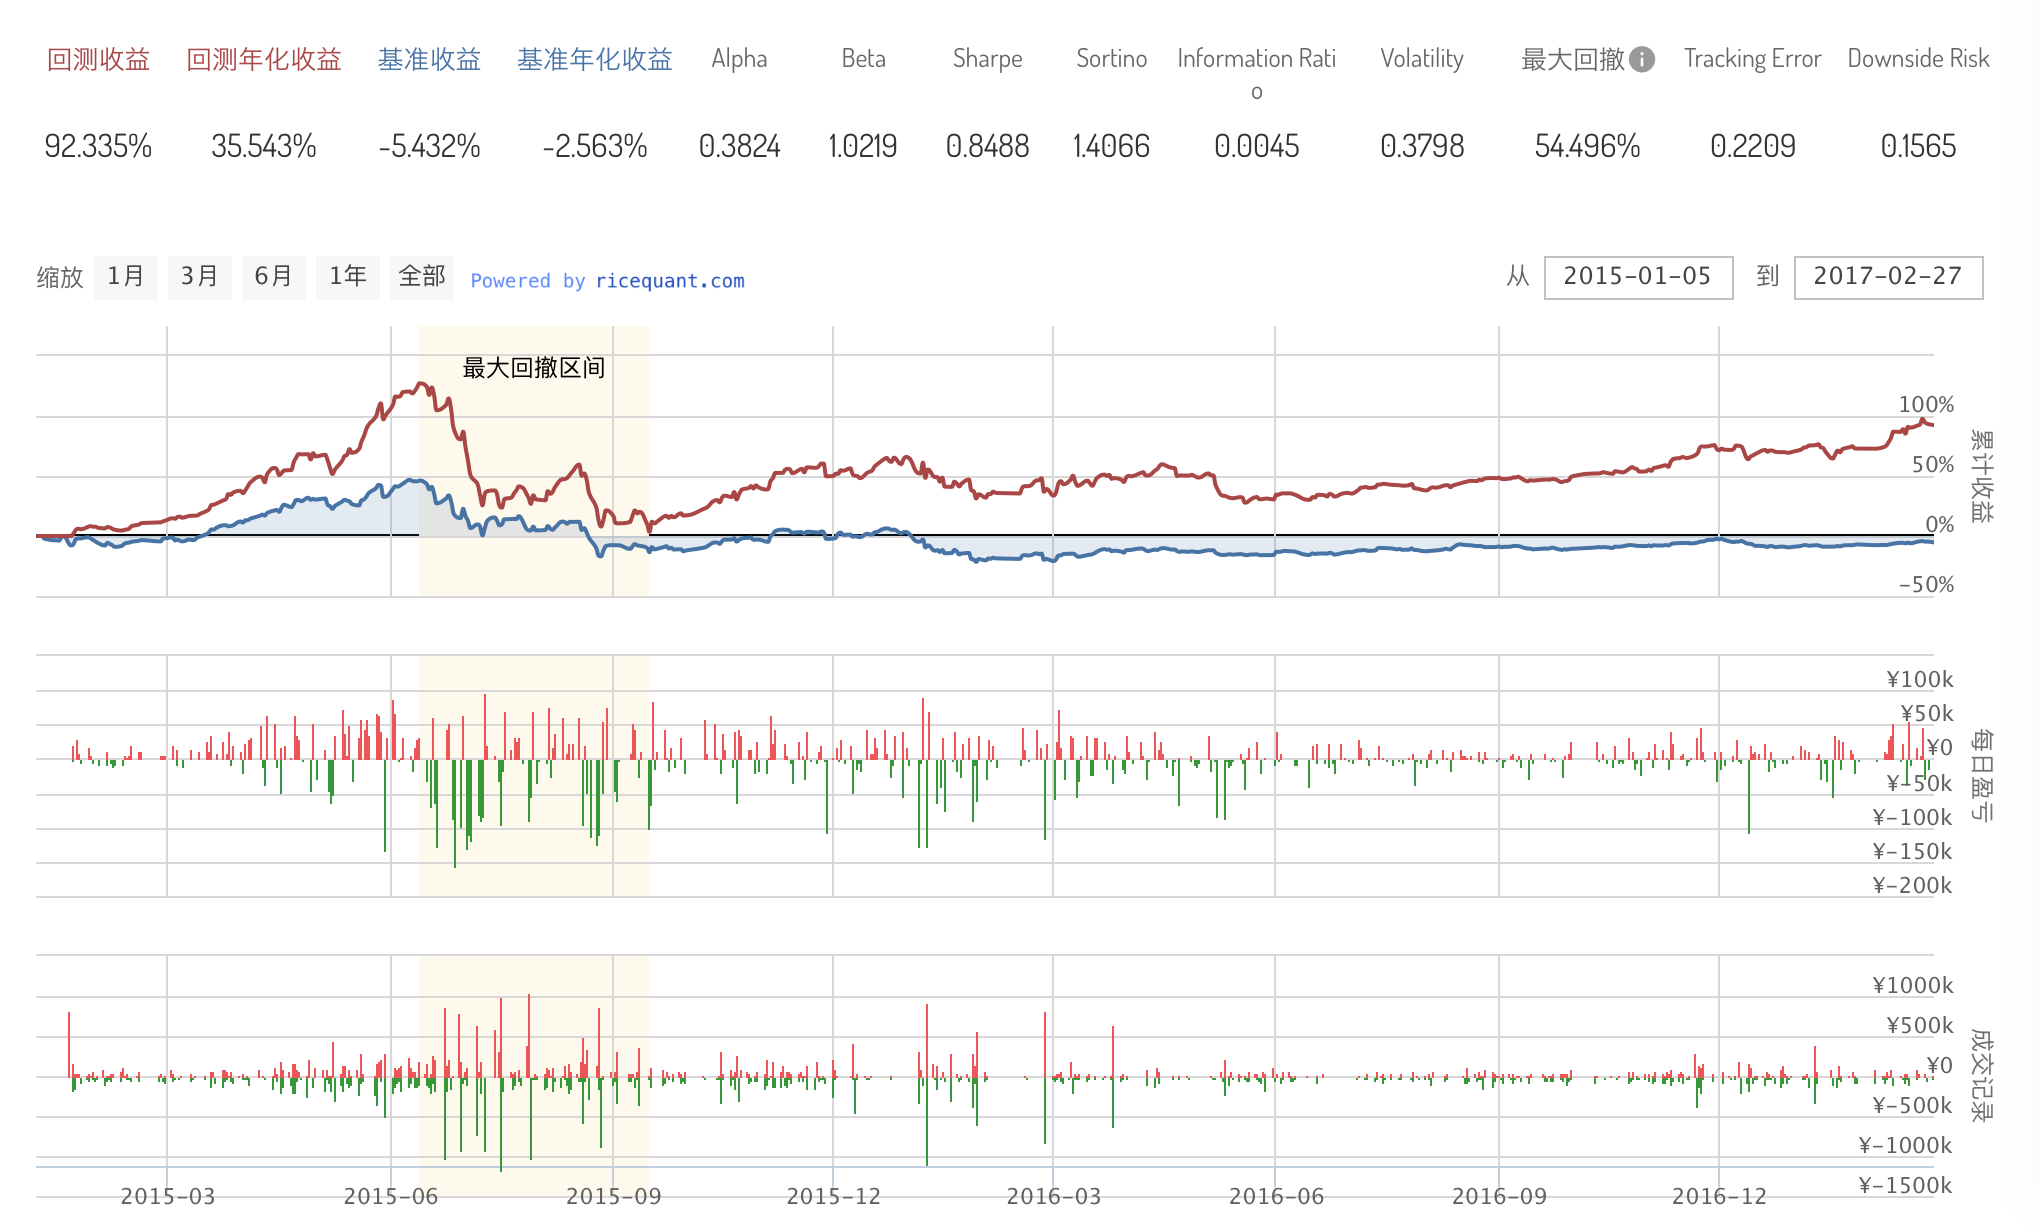

In [1]:
from IPython.display import display, Image
display(Image(filename='收益概览.png'))

其中：

### 回测收益率: 

策略在期限内的收益率

$$回测收益 = \frac{期末投资组合总权益-期初投资组合总权益}{期初投资组合总权益} $$

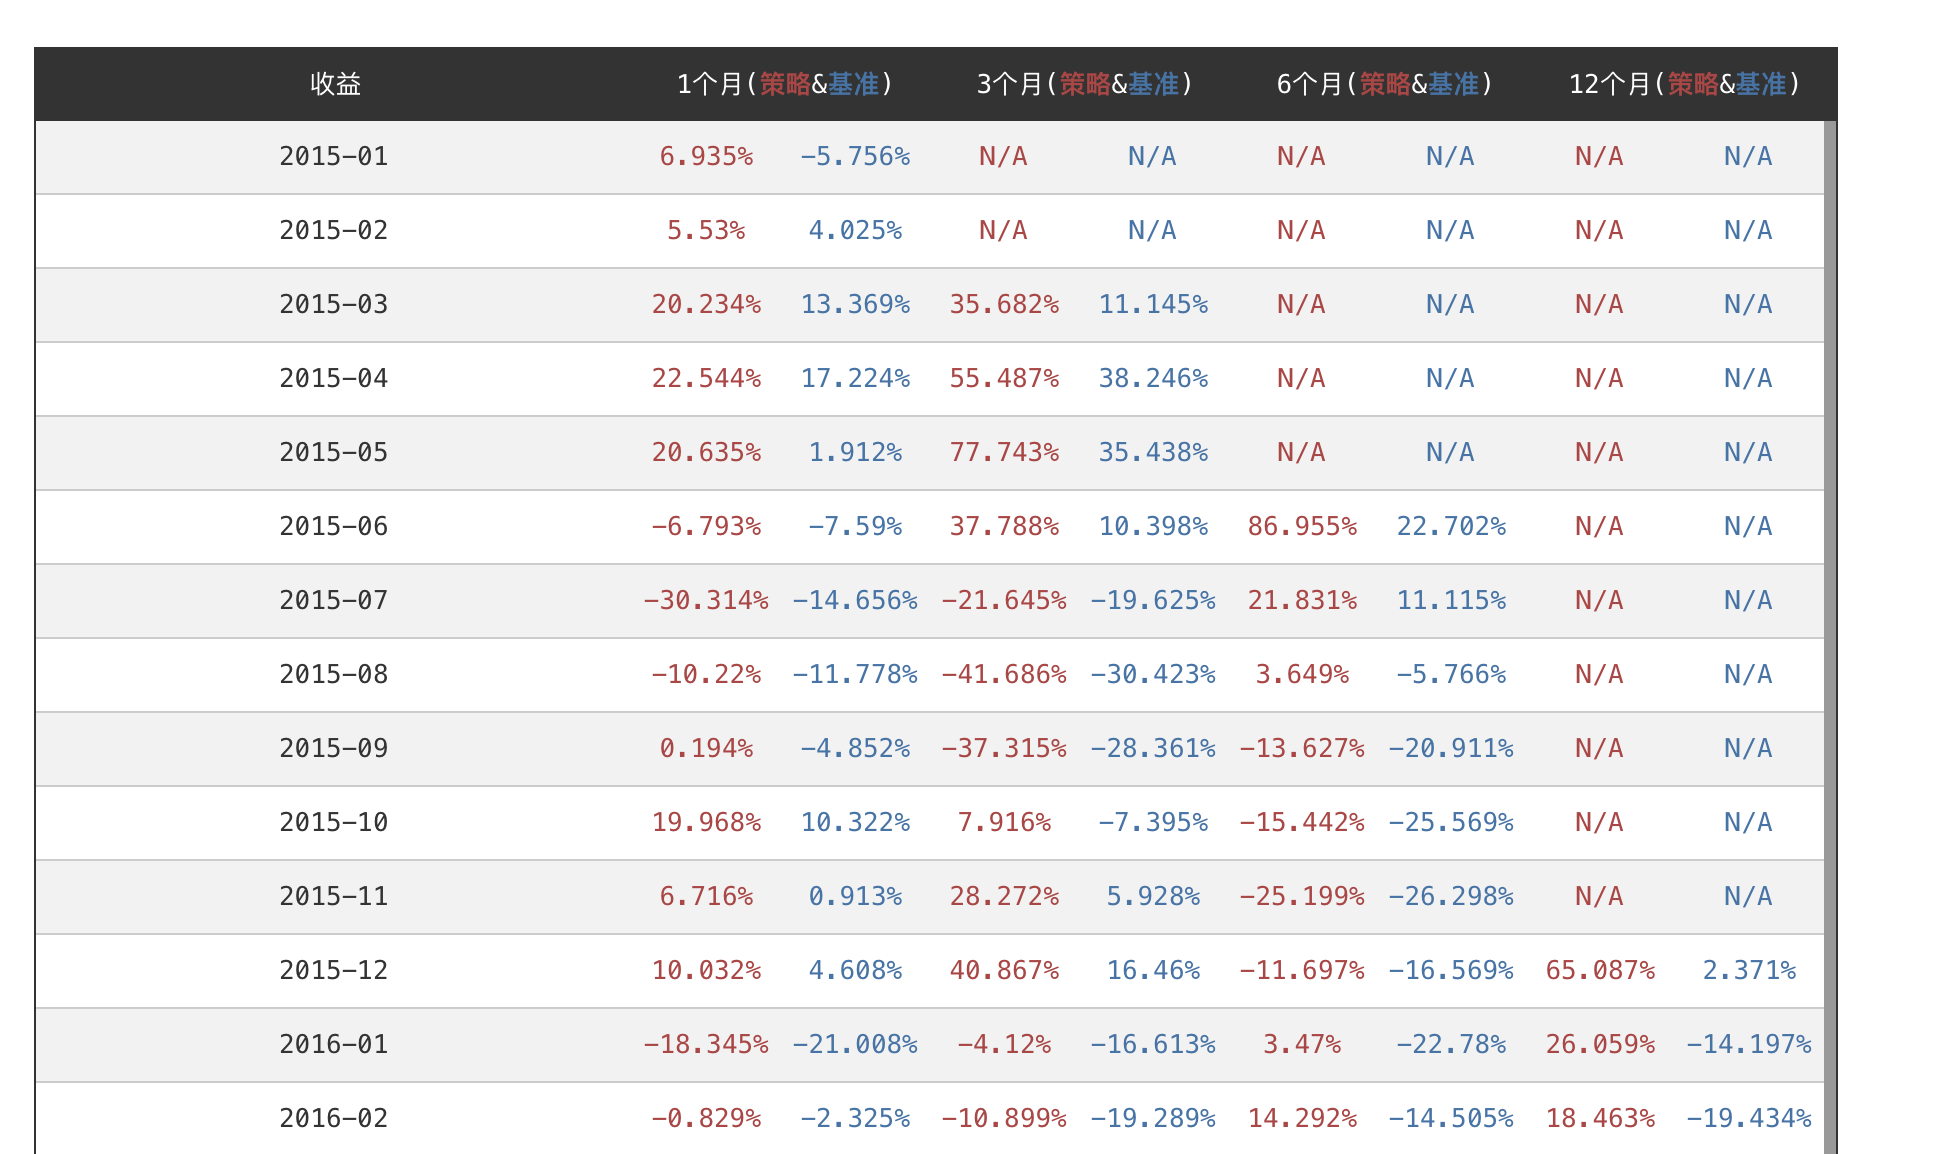

In [2]:
from IPython.display import display, Image
display(Image(filename='收益.png'))

### 年化收益

采用了复利累积以及Actual/365 Fixed的年化方式 计算得到的年化收益。

$$年化收益率 = (1+R)^\frac{1}{t}-1$$

### 基准收益率

相同条件下，一个简单的买入并持有基准合约策略的收益率（默认基准合约为沪深300指数，这里假设指数可交易，最小交易单位为1）

$$基准收益率 = \frac{买入并持有至期末投资组合总权益-期初投资组合总权益}{期初投资组合总权益} $$

### 阿尔法($alpha/ \alpha$): 

CAPM模型表达式中的残余项。表示策略所持有投资组合的收益中和市场整体收益无关的部分，是策略选股能力的度量。当策略所选股票的总体表现优于市场基准组合成分股时，阿尔法取正值；反之取负值。

$$\alpha = E[r_p-[r_f+\beta \cdot(r_b-r_f)]]$$

其中$r_p$是策略所持有投资组合收益；$r_f$为无风险投资组合收益；$\beta$为CAPM模型中的贝塔系数；$E[\cdot]$表示随机变量的期望

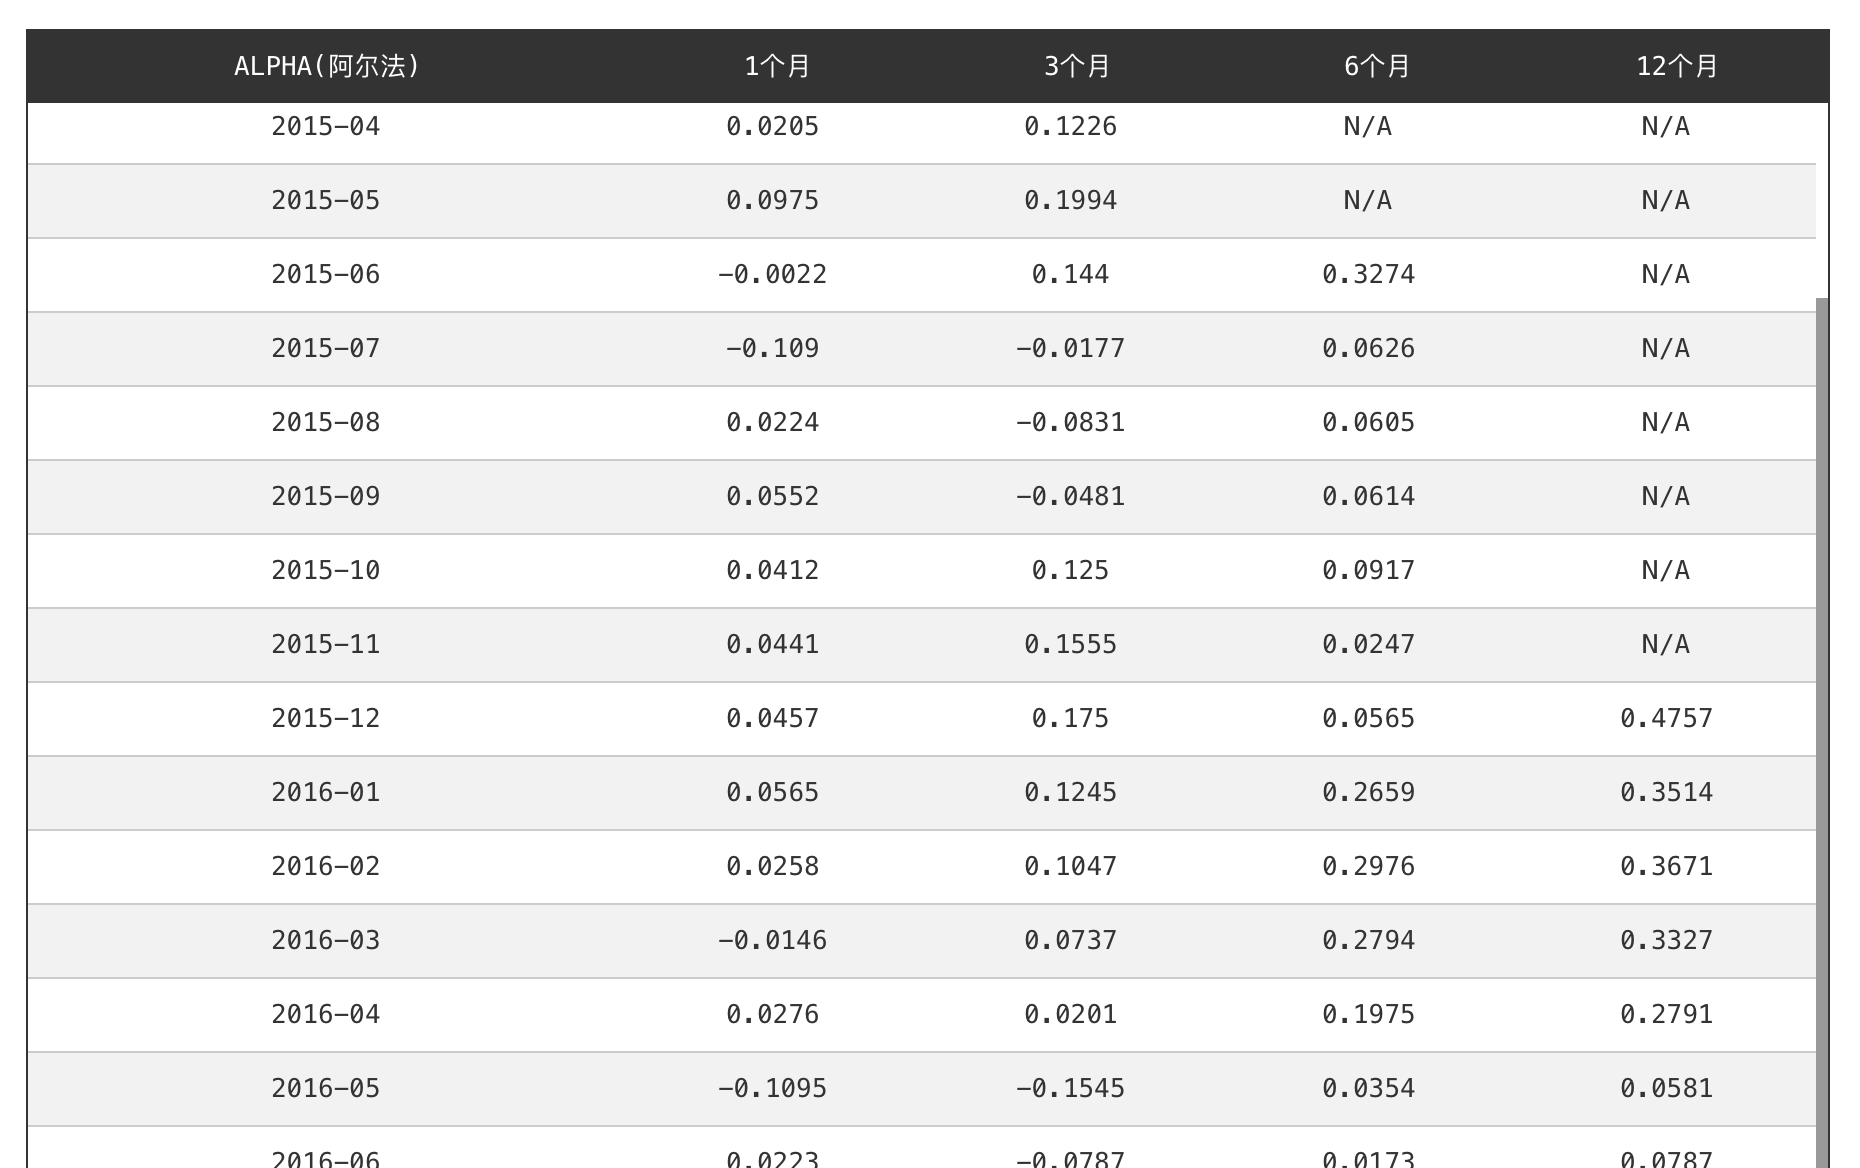

In [3]:
from IPython.display import display, Image
display(Image(filename='alpha.png'))

### 贝塔($beta/ \beta$):

CAPM模型中市场基准组合项的系数，表示资产收益对市场整体收益波动的敏感程度

$$\beta = \frac{Cov(r_p,e,r_b,e)}{Var(r_b,e)}$$

其中$r_p,e$为策略超额收益(策略收益率-无风险组合收益率)；$r_b,e$为市场基准组合超额收益(市场基准组合收益率-无风险组合收益率)；$Cov(\cdot)$表示协方差；$Var(\cdot)$表示方差

$$
\begin{array}{c|c|c|c}
\hline
\text{Beta值} & \text{解释} & \text{举例}\\
\hline
\beta<0 & 投资组合和指数基准的走向通常反方向 & 反向指数ETF或空头头寸\\
\beta=0 & 投资组合和指数基准的走向没有相关性 & 固定收益产品，他们的走向通常和股市不相关\\
0<\beta<1 & 投资组合和指数基准的走向相同，但是比指数基准的移动幅度更小 & 稳定的股票，比如制作肥皂的公司的股票，通常和市场的走势相同，但是受到每日的波动影响更小\\
\beta=1 & 投资组合和指数基准的走向相同，并且和指数基准的移动幅度贴近 & 蓝筹股，指数中占比重大的股票\\
\beta>1 & 投资组合和指数基准的走向相同，但是比指数基准的移动幅度更大 & 受每日市场消息或是受经济情况影响很大的股票\\
\hline
\end{array}
$$

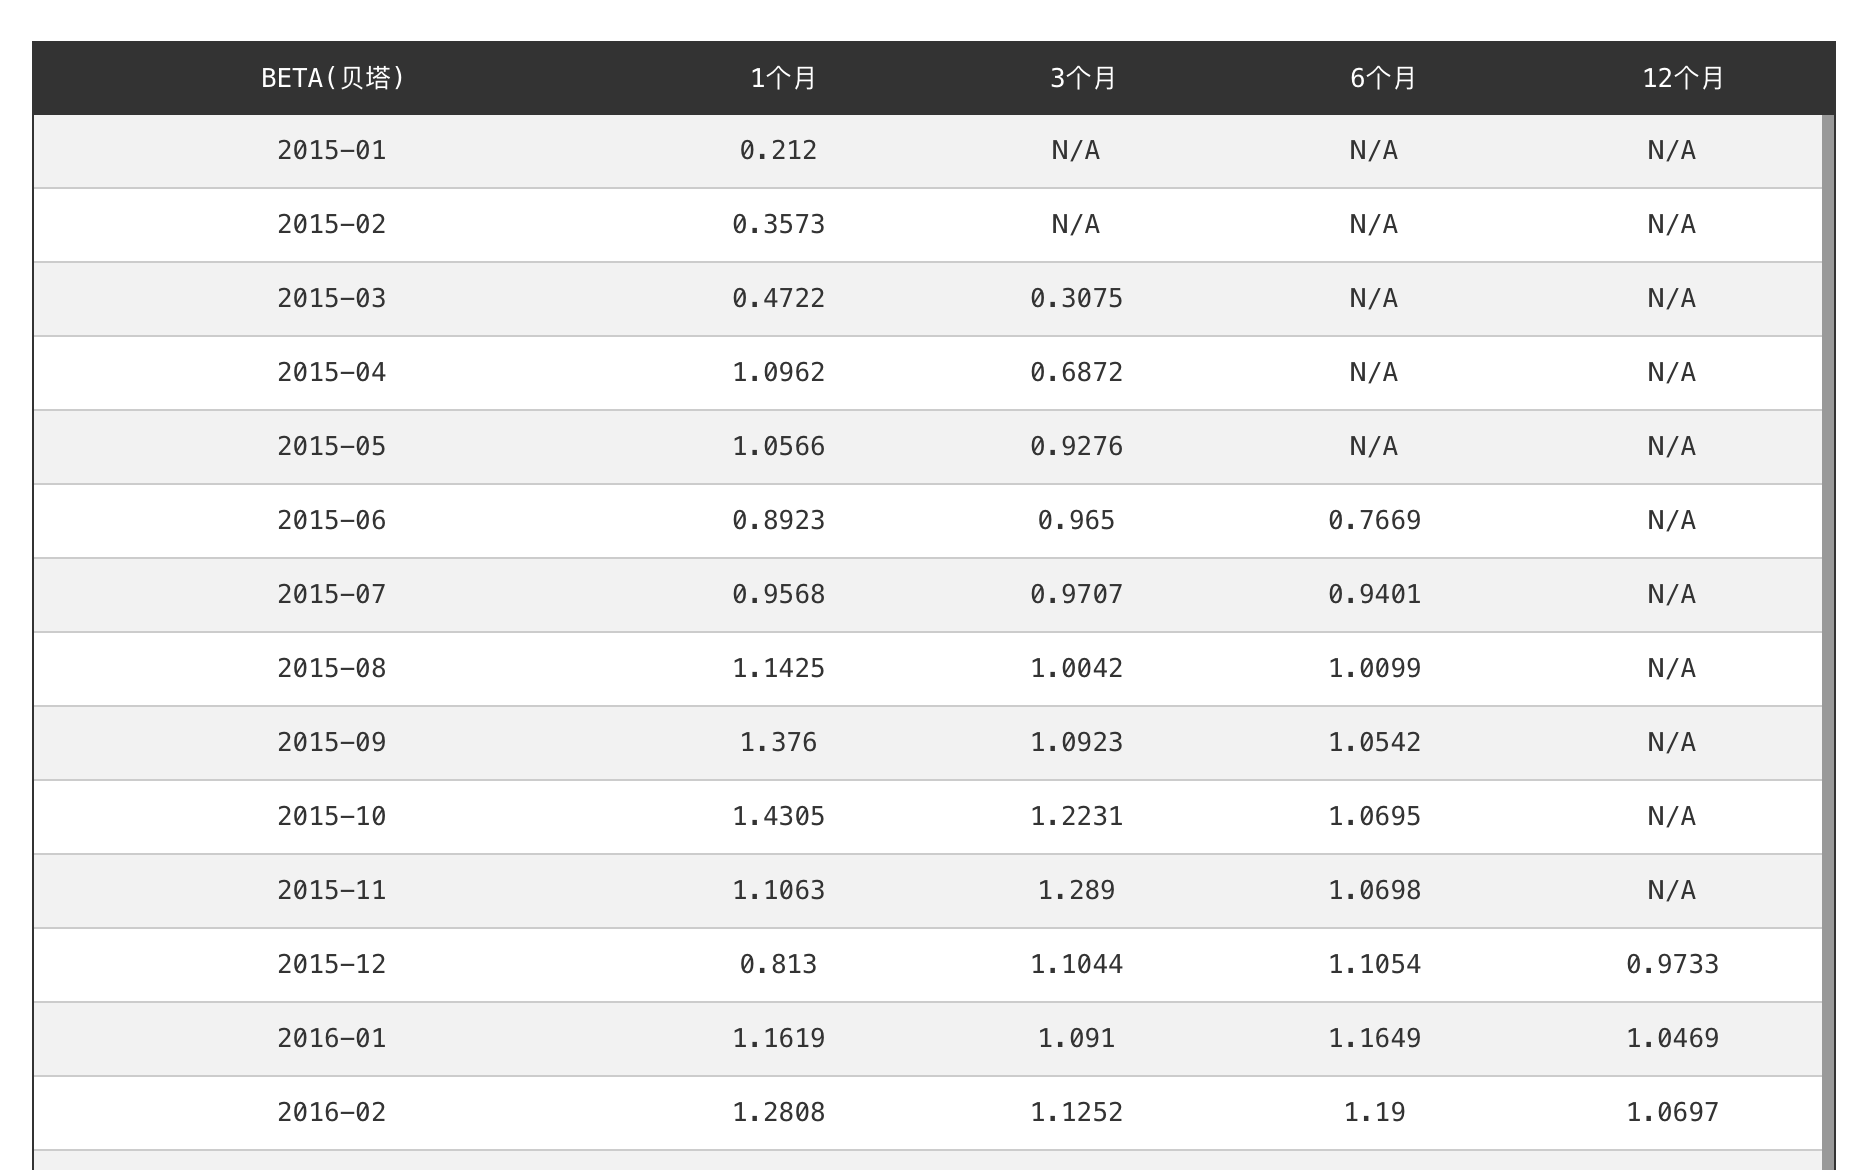

In [4]:
from IPython.display import display, Image
display(Image(filename='beta.png'))

### 风险调整后收益指标($Shaepe\ Ratio$)

衡量策略相对于无风险组合的表现，是策略所获得风险溢价的度量——即如果策略额外承担一单位的风险，可以获得多少单位的收益作为补偿

$$Daily\ Sharpe\ Ratio = \frac{\overline r_e}{\sigma_e}$$

$$\overline r_e = \frac{1}{n}\sum_{i=1}^n[r_p(i)-r_f(i)]$$

$$\sigma_e = \sqrt{\frac{1}{n-1}\sum_{i=1}^n[r_p(i)-r_f(i)-\overline r_e]^2}$$

$$Sharpe\ Ratio = \sqrt{244}\cdot Daily\ Sharpe\ Ratio$$

其中$\overline r_e$为回测期内策略日超额收益均值；$n$为回测期内交易日数；$r_p(i)$,$r_f(i)$分别为第$i$个交易日策略所持有投资组合的日收益率以及无风险组合日收益率；$\sigma_e$为策略超额收益率的波动率

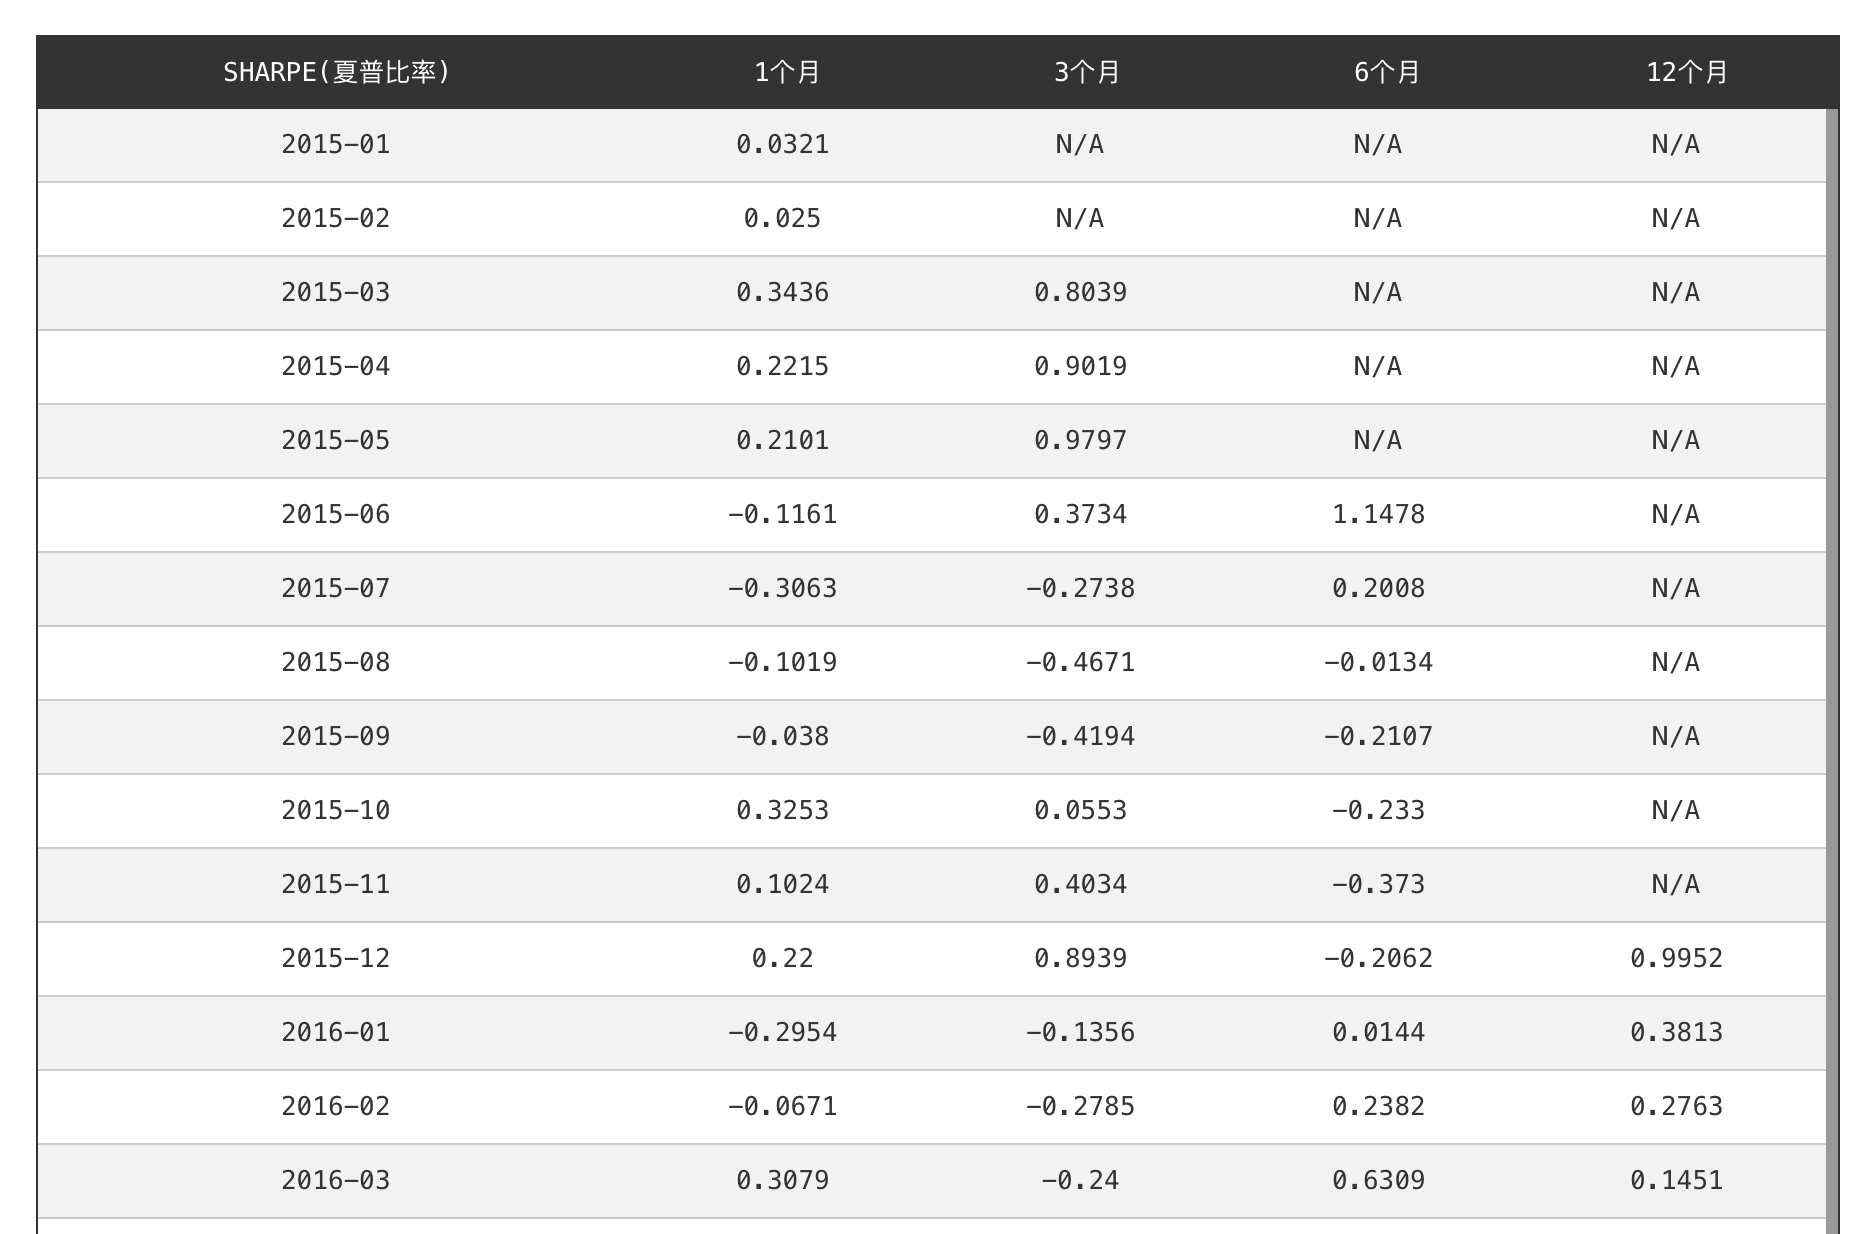

In [5]:
from IPython.display import display, Image
display(Image(filename='sharpe.png'))

### 索提诺比率($Sortino\ Ratio$): 

衡量策略相对于目标收益的表现。其使用下行波动率作为风险度量，因此区别于夏普率。在目前的计算中，我们使用基准组合收益作为目标收益，以此作为区分向上波动和向下波动的标准

$$Daily\ Sortino\ Ratio = \frac{\sqrt{244}\cdot\overline r_e}{\sigma_d}$$

$$\overline r_e = \frac{1}{n}\sum_{i=1}^n[r_p(i)-r_f(i)]$$

$$Sortino\ Ratio = \sqrt{244}\cdot Daily\ Sharpe\ Ratio$$

其中$\overline r_e$为回测期内策略日超额收益率均值；$n$为回测期内交易日数目；$r_p(1)$,$r_f(i)$分别为第$i$个交易日策略所持有投资组合的日收益率以及无风险组合日收益率；$\sigma_d$为策略年化下行波动率。

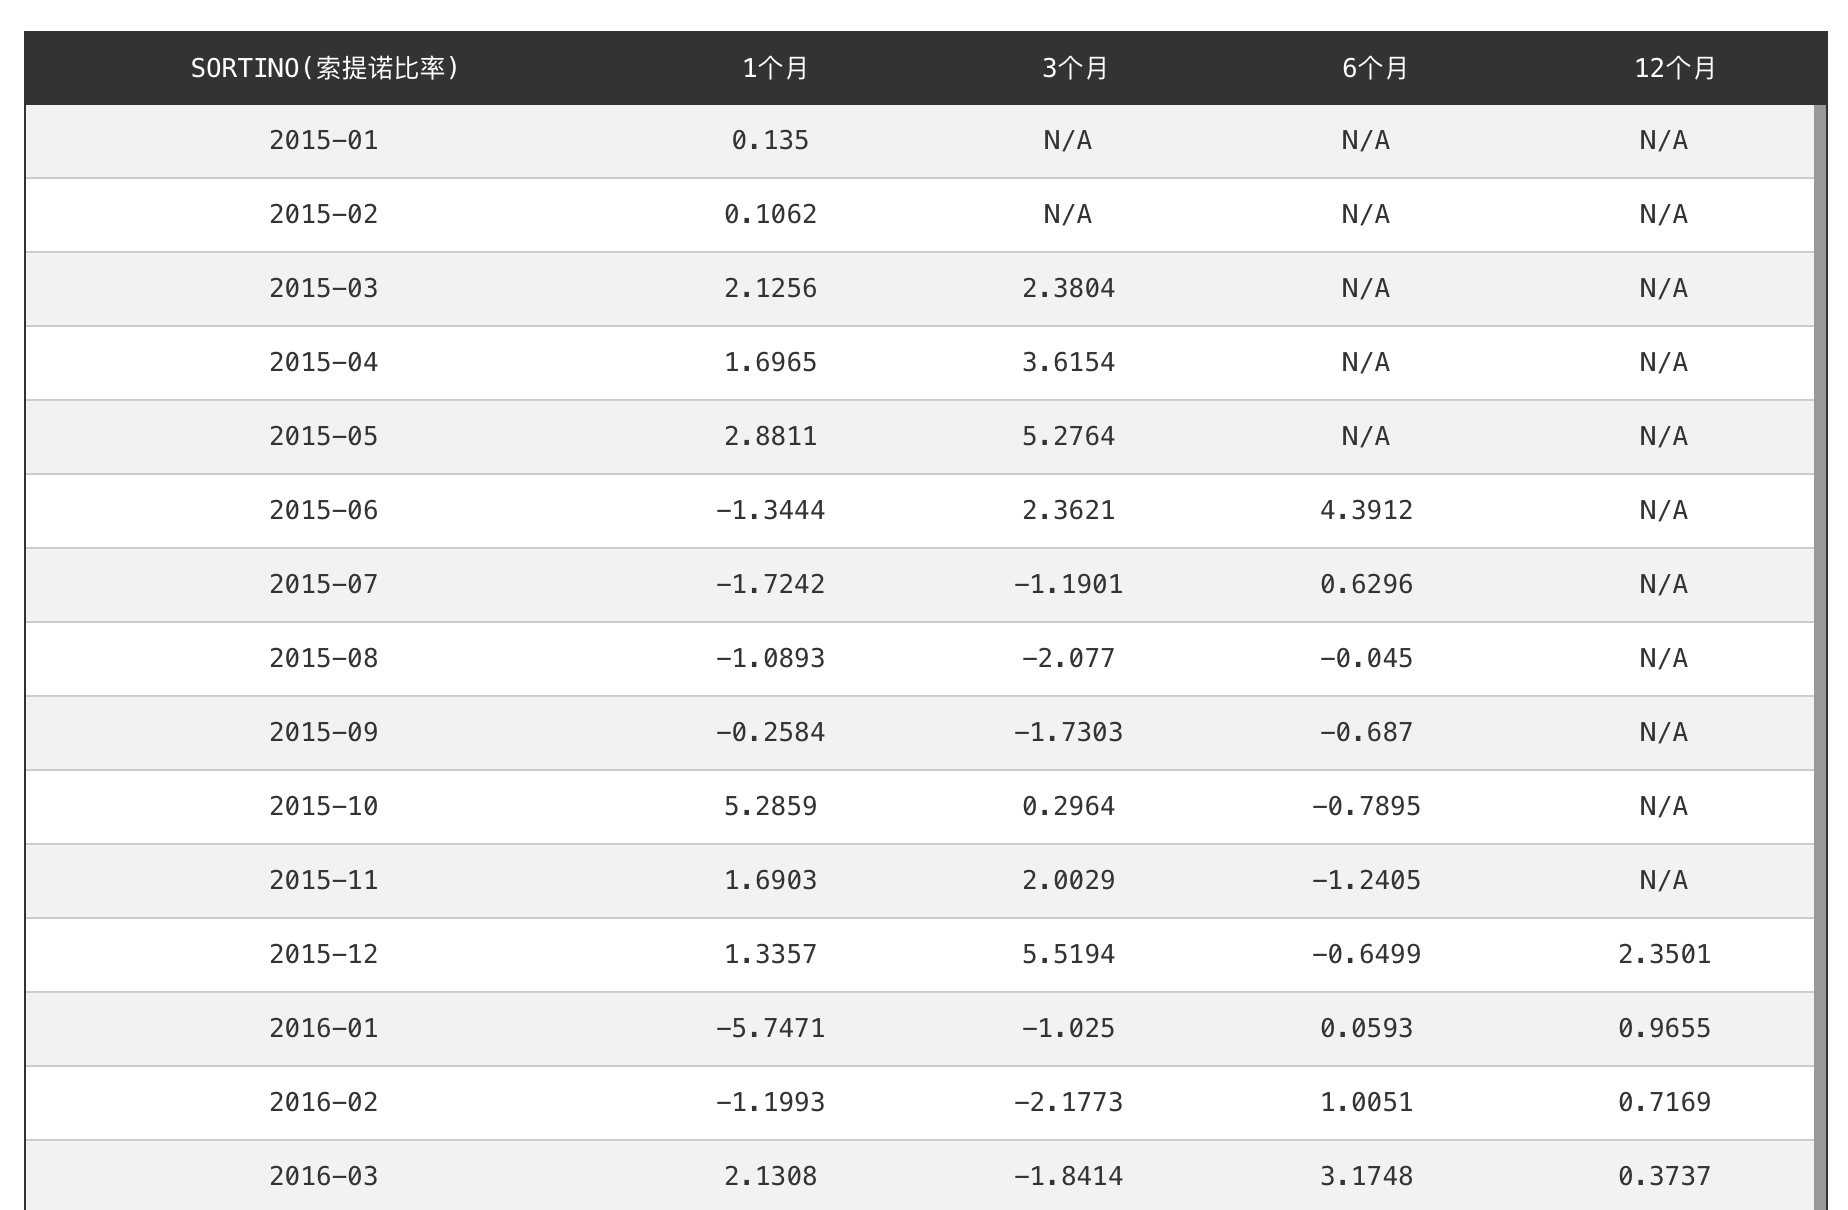

In [8]:
from IPython.display import display, Image
display(Image(filename='sortino.png'))

### 信息比率($Information\ Ratio$)

衡量策略相对于市场基准组合的表现。一般用于评估纯多头的主动交易策略（包括阿尔法策略和基准择时策略）。需要注意的是，信息率不适用于多-空结合的对冲策略的表现评估

$$Daily\ Information\ Ratio = \frac{\sqrt{244}\cdot\overline r_{pa}}{\sigma_t}$$

$$\overline r_{pa} = \frac{1}{n}\sum_{i=1}^n[r_p(i)-r_b(i)]$$

$$Information\ Ratio = \sqrt{244}\cdot Daily\ Information\ Ratio$$

其中$\overline r_{pa}$为回测期主动日收益率均值；$n$为回测期内交易日数目；$r_p(i)$,$r_b(i)$分别为第$i$个交易日策略所持有投资组合的日收益率以及基准组合日收益率；\sigma_t为策略跟踪误差。

在我们提供的三个风险调整后收益指标中，信息率用于评估投资组合相对于市场基准组合的表现，一般适用于纯多头的主动交易策略（包括阿尔法策略和基准择时策略）；夏普率用于评估投资组合相对于无风险组合的表现，一般适用于多-空结合的交易策略（例如市场中性策略或配对交易策略），或没有公认市场基准组合的投资品种的交易策略（例如期货CTA策略）。

索提诺比率使用下行波动率作为风险度量，因而有别于信息率和夏普率。下行波动率区分了收益向上波动和向下波动两种情况，并认为收益向下波动才代表风险。因此，索提诺比率的优点，在于其使用的风险度量更为切合我们实际投资中面对的风险；而其缺点则是不如信息率和夏普率常用，认知度较低，且其目标收益（区分收益波动是向上还是向下的标准）的设定是任意的，并不依赖于任何基准组合（不同于信息率和夏普率）。因此，在横向对比不同策略或基金业绩时，我们需要使用统一的目标收益来区分向上波动和向下波动。在实际计算中，我们以无风险组合收益作为索提诺比率的目标收益。

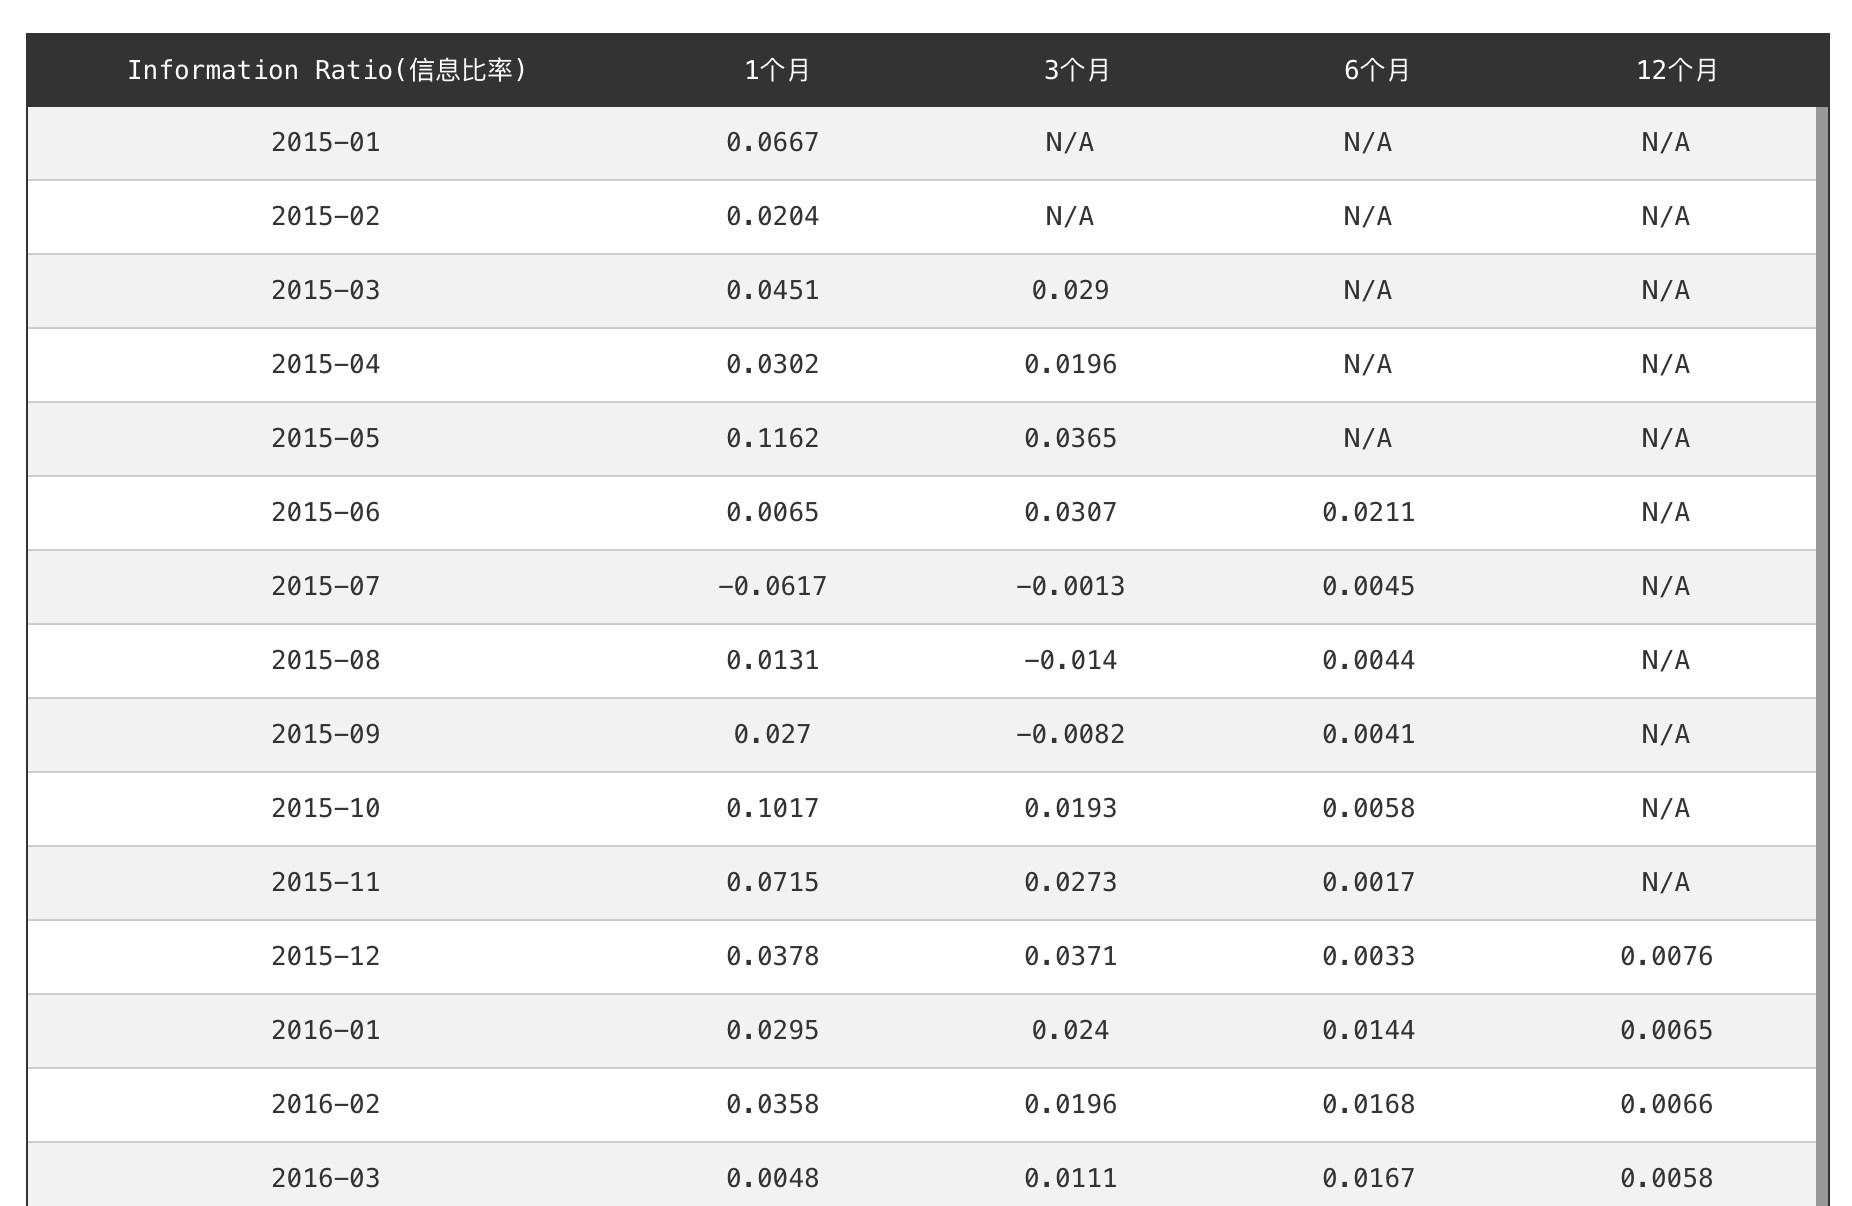

In [7]:
from IPython.display import display, Image
display(Image(filename='information ratio.png'))

### 跟踪误差($Tracking\ Error,\sigma_t$) 

纯多头主动交易策略（阿尔法策略和基准择时策略）收益和市场基准组合收益之间差异的度量。跟踪误差越大，意味着策略所持有投资组合偏离基准组合的程度越大。需要注意，跟踪误差不适用于多-空结合的对冲策略的风险评估

$$\sigma_t = \sqrt{\frac{244}{n-1}\sum_{i=1}^n[r_{pa}(i)-\overline r_{pa}]^2}$$

$$r_{pa}(i) = r_p(i)-r_b(i)$$

其中，$n$为回测期内交易日数量；$r_p(i)$,$r_b(i)$分别表示第$i$个交易日策略所持有投资组合的日收益率和基准组合的日收益率

### 年化下行波动率($Downside\ Risk,\sigma_d$)

相比波动率，下行波动率对收益向下波动和向上波动两种情况做出了区分，并认为只有收益向下波动才意味着风险。在实际计算中，我们统一使用基准组合收益为目标收益，作为向上波动和向下波动的判断标准

$$\sigma_d = \sqrt{\frac{244}{n-1}\sum_{i=1}^n[r_p(i)-r_b(i)]^2\cdot I(i)}$$

$$I(i) = \begin{cases} 1, & \text{$r_p(i)$ < $r_b(i)$}\\ 0, & \text{$r_p(i)$ $\ge$ $r_b(i)$} \end{cases}$$

其中，$n$为回测期内交易日数量；$r_p(i)$,$r_b(i)$分别表示第个交易日策略所持有投资组合的日收益率、基准组合的日收益率；$I(i)$为指示函数(indicator function)，如果第i个交易日策略所持有投资组合收益低于基准组合收益，则标记为1（向下波动），否则标记为0（向上波动）

### 最大回撤($Max\ Drawdown$)

计算回测期内策略的最低总权益，和此前最高总权益的差距，评估策略表现的稳定性

$$Max\ Drawdown = \frac{回测期内最低总权益出现前的最高总权益-回测期内最低总权益}{投回测期内的最低总权益}$$

例如，假定策略在回测开始时，资金为 ¥ 1,000,000，一段时间增加至¥ 1,100,000，其后跌至 ¥ 940,000，然后又回升到 ¥ 1,050,000，再跌至 ¥ 890,000，到回测结束时，剩余资金为 ¥ 1,200,000。则其最大回撤为$$\frac{1100000-890000}{890000} = 23.60\%$$
